In [1]:
import numpy as np
import h5py

import vae as vae_util

from keras import backend as K
from keras import layers
from keras.models import Model


Using TensorFlow backend.


In [2]:
data_dir = '/data3/Astro/lstm_rom/explore/data/9w_bhp_wl/'

hf_r = h5py.File(data_dir + 'pres_sat.mat', 'r')
sat = np.array(hf_r.get('sat'))
hf_r.close()
sat0 = sat.copy()

In [3]:
nr = 10000
sat = sat.reshape((nr, 60, 60, 1))
shuffle_ind = np.random.permutation(nr)
sat = sat[shuffle_ind,:, :, :]


In [4]:
import vae as vae_util

In [5]:
from vae_train import *


In [15]:
latent_dim = 50

In [16]:
vae_model, encoder, decoder, vae_kl_loss = create_vae(latent_dim)
vae_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 60, 60, 1)    0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 50), (None,  3866788     input_2[0][0]                    
__________________________________________________________________________________________________
sampler (Lambda)                (None, 50)           0           encoder[1][0]                    
                                                                 encoder[1][1]                    
__________________________________________________________________________________________________
decoder (Model)                 (None, 60, 60, 1)    2602945     sampler[0][0]                    
Total para

In [17]:
output_dir = '/data3/Astro/lstm_rom/explore/saved_models/'

In [18]:
num_train, epoch = 3000, 10

In [19]:
vae_model.load_weights(output_dir + 'ae_deep_bn_gaussian_mse_nt%d_l%d_lr1e-3_ep%d.h5' % (num_train, latent_dim, epoch))

In [20]:
num_train = 10
num_eval = 10
sat_train = sat[:num_train, ...]
sat_eval = sat[-num_eval:, ...]


In [21]:
sat_pred_eval = vae_model.predict(sat_eval)
sat_pred_train = vae_model.predict(sat_train)

In [22]:
sat_pred_eval.shape

(10, 60, 60, 1)

In [23]:
import matplotlib.pyplot as plt

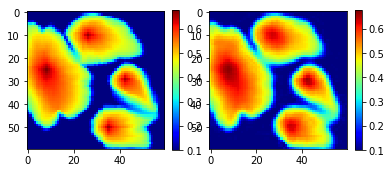

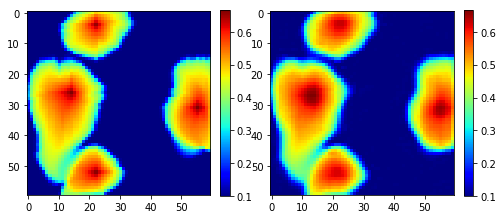

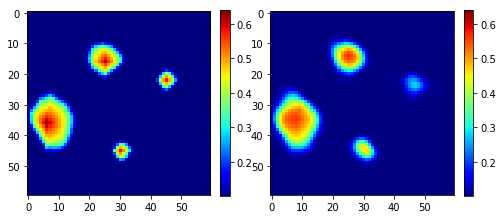

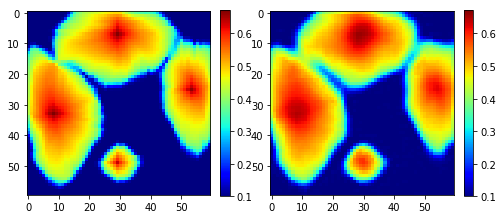

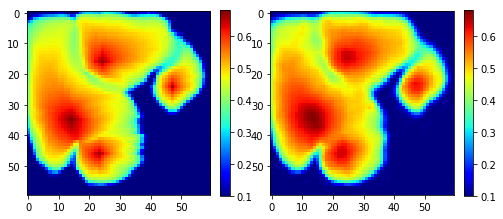

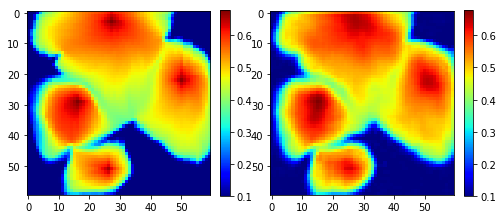

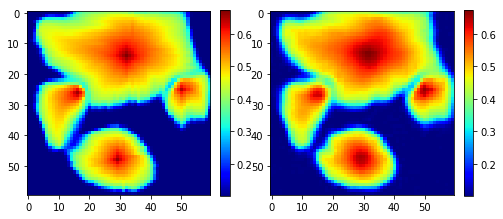

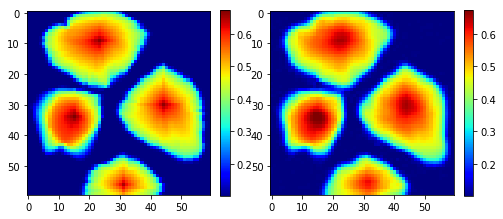

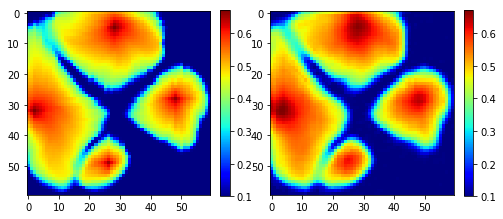

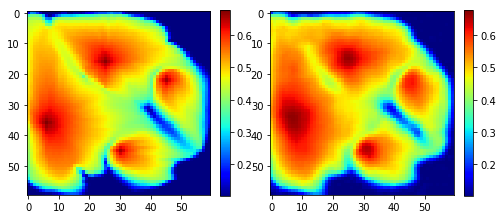

In [24]:
plt.set_cmap('jet')
for k in range(10):
    plt.figure(k,figsize=(8,6))
    plt.subplot(1,2,1)
    plt.imshow(sat_eval[k, :, :, 0])
    plt.colorbar(fraction=0.046)
    plt.subplot(1,2,2)
    plt.imshow(sat_pred_eval[k, :, :, 0])
    plt.clim([sat_eval[k,:,:,0].min(), sat_eval[k,:,:,0].max()])
    plt.colorbar(fraction=0.046)
#     plt.layout('tight')
plt.show()

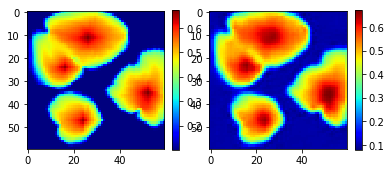

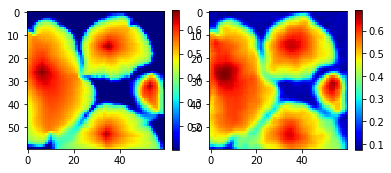

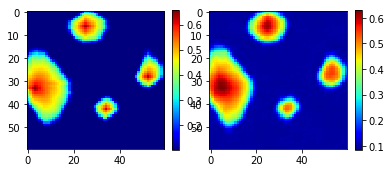

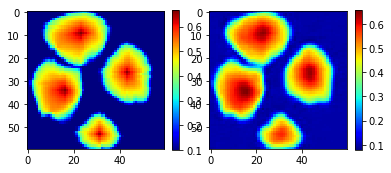

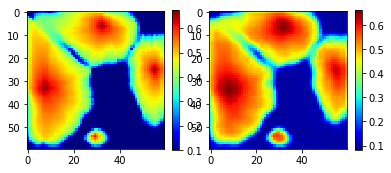

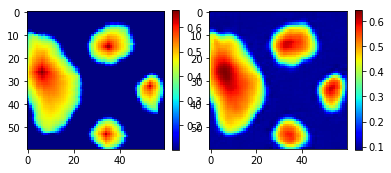

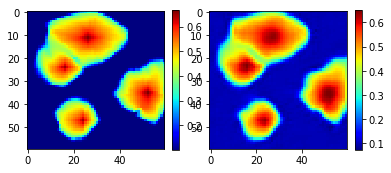

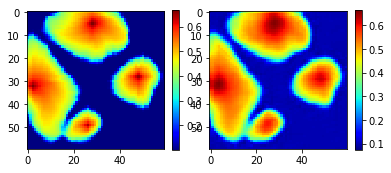

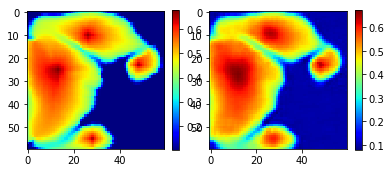

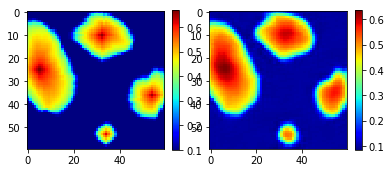

In [25]:
plt.set_cmap('jet')
for k in range(10):
    plt.figure(k)
    plt.subplot(1,2,1)
    plt.imshow(sat_train[k, :, :, 0])
    plt.colorbar(fraction=0.046)
    plt.subplot(1,2,2)
    plt.imshow(sat_pred_train[k, :, :, 0])
    plt.colorbar(fraction=0.046)
plt.show()

In [26]:
sat0.shape

(36000000,)

In [27]:
sat0 = sat0.reshape((100,100,3600))

<Figure size 432x288 with 0 Axes>

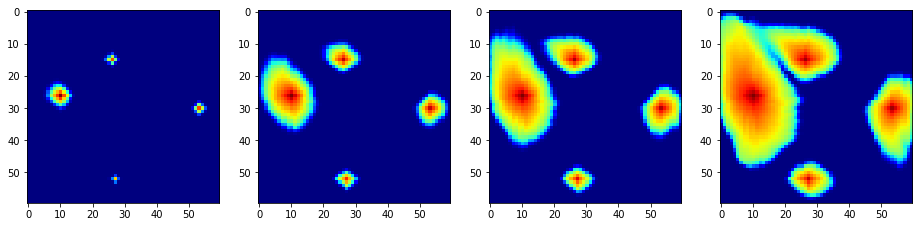

In [28]:
plt.set_cmap('jet')
plt.figure(figsize=(20,10))
for ipod, k in enumerate([0, 5, 11, 25]):
    plt.subplot(1, 5, ipod+1)
    plt.imshow(sat0[0, k, :].reshape((60,60)))
plt.show()

In [29]:
sat_end = sat0[:,-1,:].reshape((100, 60, 60, 1))
sat_end.shape

(100, 60, 60, 1)

In [30]:
sat_start = sat0[:, 0, :].reshape((100, 60, 60, 1))

In [31]:
xi_start = encoder.predict(sat_start)[0]
xi_start.shape

(100, 50)

In [32]:
xi_end = encoder.predict(sat_end)[0]
xi_end.shape

(100, 50)

In [33]:
xi_start_mean = np.mean(xi_start, axis=0)
xi_start_mean.shape

(50,)

In [34]:
xi_end_mean = np.mean(xi_end, axis=0)
xi_end_mean.shape

(50,)

In [35]:
sat_end_mean = decoder.predict(xi_end_mean[None, :])
sat_end_mean.shape
sat_start_mean = decoder.predict(xi_start_mean[None, :])
sat_start_mean.shape

(1, 60, 60, 1)

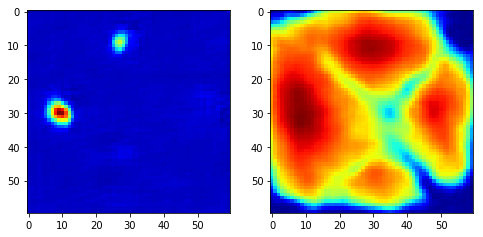

In [36]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(sat_start_mean[0,:,:,0])
plt.subplot(1,2,2)
plt.imshow(sat_end_mean[0,:,:,0])
plt.show()


In [37]:
num_step = 100
dxi_time = (xi_end_mean - xi_start_mean) / num_step

In [38]:
sat0.shape

(100, 100, 3600)

In [39]:
ind_case = 5

In [40]:
sat_real1 = sat0[ind_case,:,:].reshape((100, 60, 60, 1))
sat_real1.shape


(100, 60, 60, 1)

In [41]:
k0=5

In [42]:
sat0_real1_pred = vae_model.predict(sat_real1[[k0], :, :, :])
xi0_real1 = encoder.predict(sat_real1[[k0], :, :, :])[0]

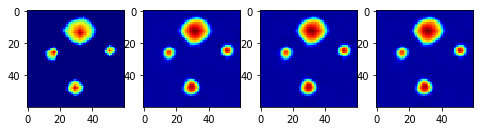

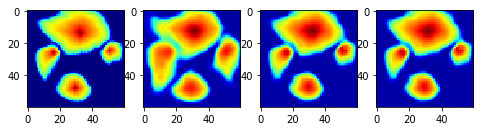

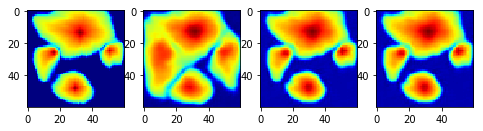

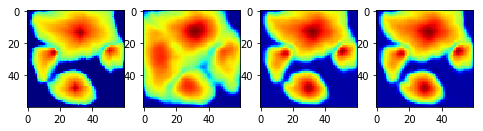

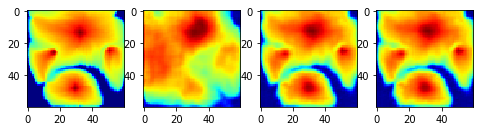

In [43]:
for k in [0,20,30,40,80]:
    xit_real1 = xi0_real1 + 3*k*dxi_time
    sat_t_real1 = decoder.predict(xit_real1)

    sat0_real1_pred1 = vae_model.predict(sat_real1[[k+k0], :, :, :])
    sat0_real1_pred2 = vae_model.predict(sat_real1[[k+k0], :, :, :])
    plt.figure(figsize=(8,5))
    plt.subplot(1,4,1)
    plt.imshow(sat_real1[k+k0, :, :, 0])
    plt.subplot(1,4,2)
    plt.imshow(sat_t_real1[0,:,:,0])
    
    plt.subplot(1,4,3)
    plt.imshow(sat0_real1_pred1[0,:,:,0])
    plt.subplot(1,4,4)
    plt.imshow(sat0_real1_pred2[0,:,:,0])
plt.show()

# Project xi onto dxi

In [44]:
sat0.shape

(100, 100, 3600)

In [45]:
sat1 = sat0.reshape((10000,60,60,1))

In [46]:
xi = encoder.predict(sat1)

In [47]:
xi = xi[0].reshape((100,100,50))

/data3/Astro/global/miniconda3/envs/tf-cpu-1.11.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


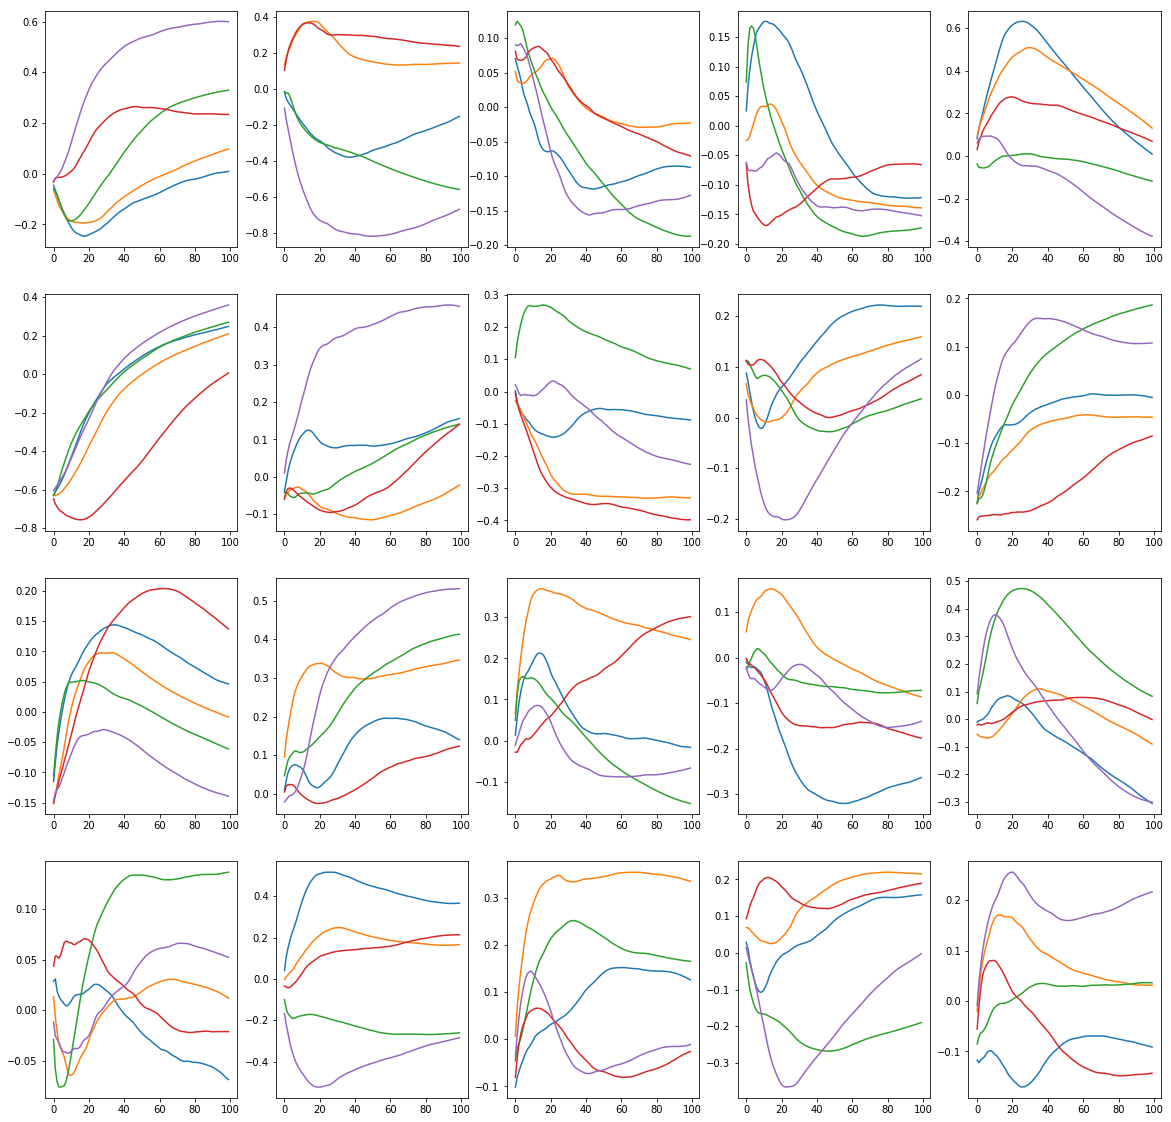

In [48]:
plt.figure(figsize=(20,20))
for k in range(5):
    for ipod in range(20):
        plt.subplot(4,5,ipod+1)
        plt.plot(xi[k,:,ipod])
plt.show()

In [49]:
xi.shape

(100, 100, 50)

In [50]:
k0=3
dxi = xi[:,k0:,:] - xi[:,[k0],:]
dxi.shape

(100, 97, 50)

In [51]:
num_case, num_step, num_dim = 50, 100, 50
alpha = np.zeros((num_case, num_step-k0))
# dxi_proj = np.zeros((num_case, num_step-k0, num_dim))
# dxi_proj_norm = np.zeros((num_case, num_step-1))
# xi_proj = np.zeros((num_case, num_step-1, num_dim))
# xi_proj_norm = np.zeros((num_case, num_step-1))
# xi_error = np.zeros((num_case, num_step-1, num_dim))
# xi_error_norm  = np.zeros((num_case, num_step-1))
# dxi_error = np.zeros((num_case, num_step-1, num_dim))
# dxi_error_norm = np.zeros((num_case, num_step-1))

In [52]:
for k in range(num_case):
    alpha[k, :] = dxi[k, :, :].dot(dxi_time[:, None])[:,0]/np.linalg.norm(dxi_time)
#     for t in range(num_step-1):
#         dxi_proj[k, t, :] = alpha[k, t] * dxi_time / np.linalg.norm(dxi_time)
#         dxi_proj_norm[k, t] = np.linalg.norm(dxi_proj[k, t, :])
#         dxi_error[k, t, :] = dxi[k, t, :] - dxi_proj[k,t,:]
#         dxi_error_norm[k, t] = np.linalg.norm(dxi_error[k, t, :])
#         xi_proj[k, t, :] = dxi_proj[k,t,:] + xi[k,[0],:]
#         xi_proj_norm[k, t] = np.linalg.norm(xi_proj[k, t, :])
#         xi_error[k, t, :] = xi[k, t+1, :] - xi_proj[k,t,:]
#         xi_error_norm[k, t] = np.linalg.norm(xi_error[k, t, :])
        
        

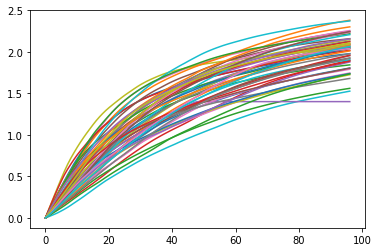

In [53]:
plt.figure()
for k in range(num_case):
    plt.plot(alpha[k,:])
plt.show()

## Project with alpha

In [54]:
sat0.shape

(100, 100, 3600)

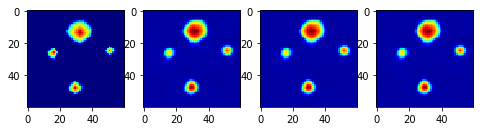

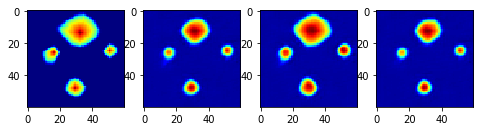

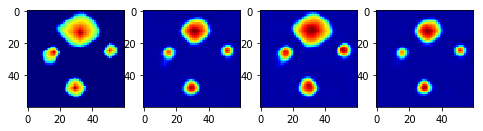

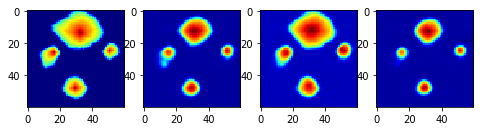

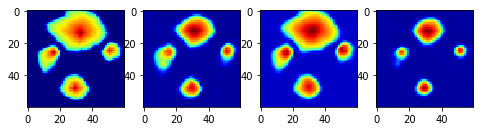

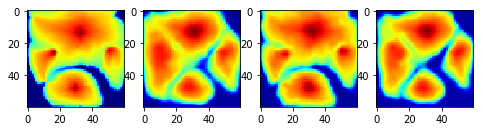

In [55]:
ind_case = 5
sat_real1 = sat0[ind_case,:,:].reshape((100, 60, 60, 1))
xi0_real1 = encoder.predict(sat_real1[[k0], :, :, :])[0]
for k in [0,5,6,10,15,80]:
    xit_real1 = xi0_real1 + alpha[ind_case, k]*dxi_time/np.linalg.norm(dxi_time)
    xit_real1_linear = xi0_real1 + k*dxi_time
    sat_t_real1 = decoder.predict(xit_real1)
    sat_t_real1_linear = decoder.predict(xit_real1_linear)
    sat0_real1_pred1 = vae_model.predict(sat_real1[[k+k0], :, :, :])
    plt.figure(figsize=(8,5))
    plt.subplot(1,4,1)
    plt.imshow(sat_real1[k+k0, :, :, 0])
    plt.subplot(1,4,2)
    plt.imshow(sat_t_real1[0,:,:,0])
    plt.subplot(1,4,3)
    plt.imshow(sat0_real1_pred1[0,:,:,0])
    plt.subplot(1,4,4)
    plt.imshow(sat_t_real1_linear[0,:,:,0])

plt.show()

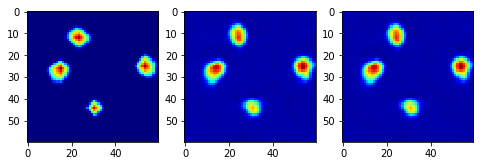

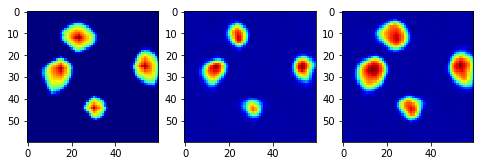

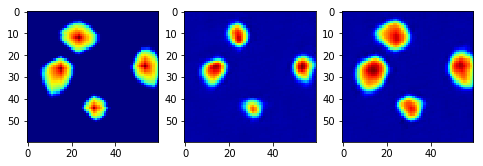

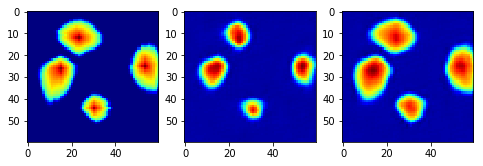

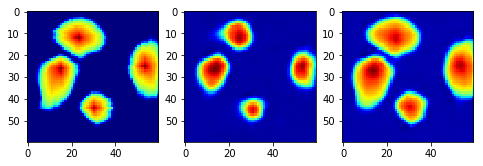

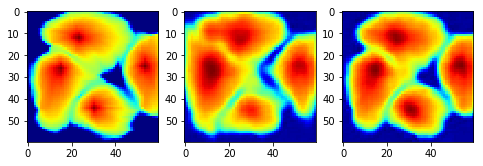

In [56]:
ind_case = 18
sat_real1 = sat0[ind_case,:,:].reshape((100, 60, 60, 1))
sat0_real1_pred = vae_model.predict(sat_real1[[k0], :, :, :])
xi0_real1 = encoder.predict(sat_real1[[k0], :, :, :])[0]
for k in [0,5,6,10,15,80]:
    xit_real1 = xi0_real1 + alpha[ind_case, k]*dxi_time/np.linalg.norm(dxi_time)
    sat_t_real1 = decoder.predict(xit_real1)

    sat0_real1_pred1 = vae_model.predict(sat_real1[[k+k0], :, :, :])
#     sat0_real1_pred2 = vae_model.predict(sat_real1[[k+k0], :, :, :])
    plt.figure(figsize=(8,5))
    plt.subplot(1,3,1)
    plt.imshow(sat_real1[k+k0, :, :, 0])
    plt.subplot(1,3,2)
    plt.imshow(sat_t_real1[0,:,:,0])
    
    plt.subplot(1,3,3)
    plt.imshow(sat0_real1_pred1[0,:,:,0])

plt.show()

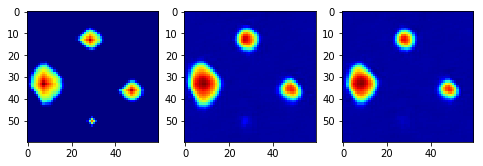

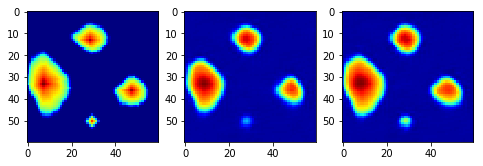

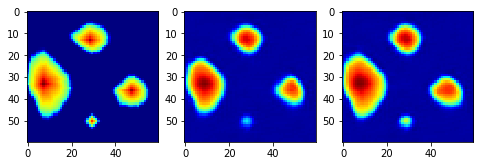

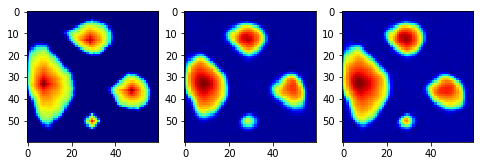

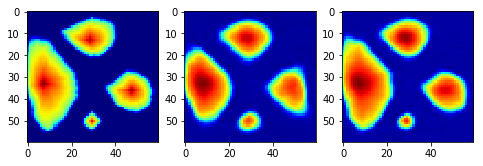

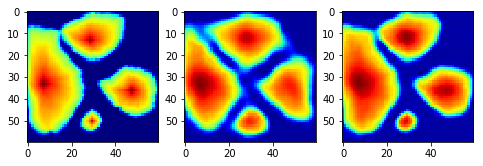

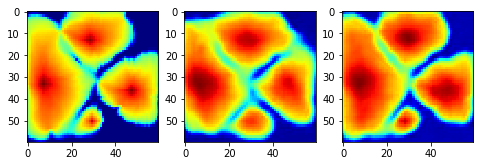

In [57]:
ind_case = 48
sat_real1 = sat0[ind_case,:,:].reshape((100, 60, 60, 1))
sat0_real1_pred = vae_model.predict(sat_real1[[k0], :, :, :])
xi0_real1 = encoder.predict(sat_real1[[k0], :, :, :])[0]
for k in [0,5,6,10,15,30,80]:
    xit_real1 = xi0_real1 + alpha[ind_case, k+k0]*dxi_time/np.linalg.norm(dxi_time)
    sat_t_real1 = decoder.predict(xit_real1)

    sat0_real1_pred1 = vae_model.predict(sat_real1[[k+k0], :, :, :])
#     sat0_real1_pred2 = vae_model.predict(sat_real1[[k+k0], :, :, :])
    plt.figure(figsize=(8,5))
    plt.subplot(1,3,1)
    plt.imshow(sat_real1[k+k0, :, :, 0])
    plt.subplot(1,3,2)
    plt.imshow(sat_t_real1[0,:,:,0])
    
    plt.subplot(1,3,3)
    plt.imshow(sat0_real1_pred1[0,:,:,0])

plt.show()

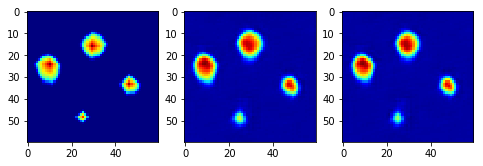

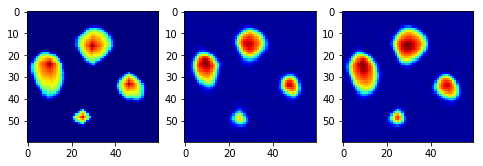

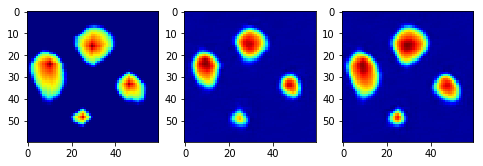

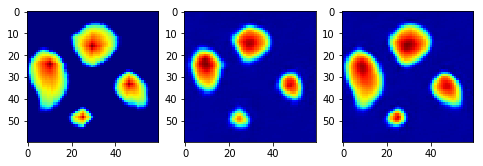

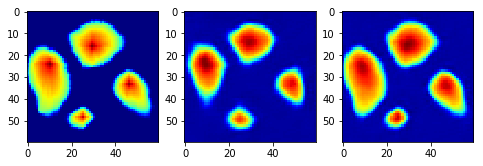

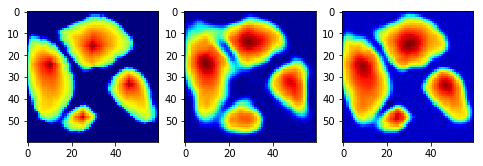

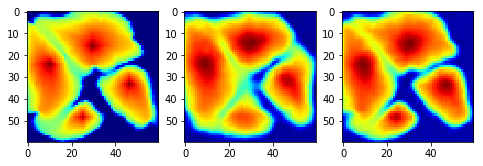

In [58]:
ind_case = 37
sat_real1 = sat0[ind_case,:,:].reshape((100, 60, 60, 1))
sat0_real1_pred = vae_model.predict(sat_real1[[k0], :, :, :])
xi0_real1 = encoder.predict(sat_real1[[k0], :, :, :])[0]
for k in [0,5,6,10,15,30,80]:
    xit_real1 = xi0_real1 + alpha[ind_case, k+k0]*dxi_time/np.linalg.norm(dxi_time)
    sat_t_real1 = decoder.predict(xit_real1)

    sat0_real1_pred1 = vae_model.predict(sat_real1[[k+k0], :, :, :])
#     sat0_real1_pred2 = vae_model.predict(sat_real1[[k+k0], :, :, :])
    plt.figure(figsize=(8,5))
    plt.subplot(1,3,1)
    plt.imshow(sat_real1[k+k0, :, :, 0])
    plt.subplot(1,3,2)
    plt.imshow(sat_t_real1[0,:,:,0])
    
    plt.subplot(1,3,3)
    plt.imshow(sat0_real1_pred1[0,:,:,0])

plt.show()

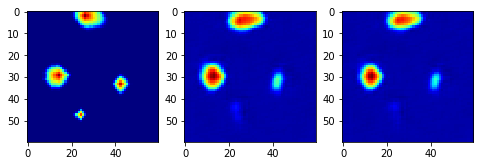

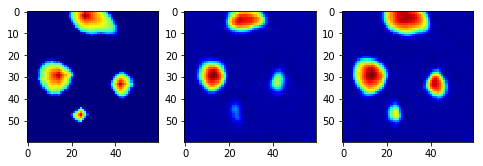

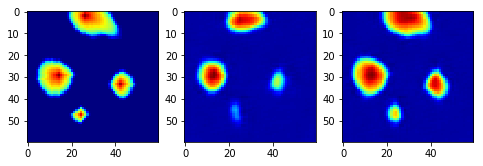

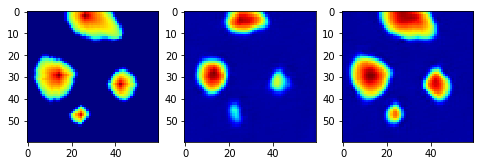

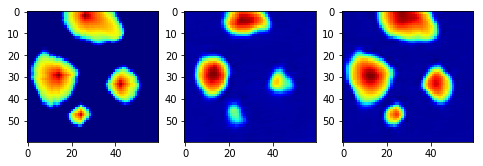

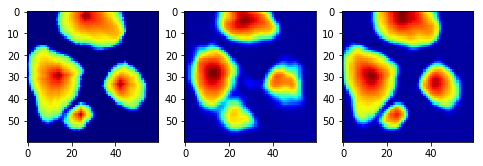

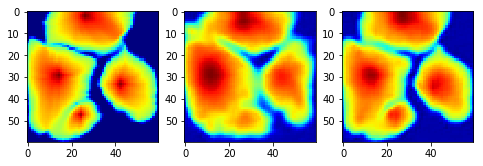

In [60]:
ind_case = 49
sat_real1 = sat0[ind_case,:,:].reshape((100, 60, 60, 1))
sat0_real1_pred = vae_model.predict(sat_real1[[k0], :, :, :])
xi0_real1 = encoder.predict(sat_real1[[k0], :, :, :])[0]
for k in [0,5,6,10,15,30,80]:
    xit_real1 = xi0_real1 + alpha[ind_case, k+k0]*dxi_time/np.linalg.norm(dxi_time)
    sat_t_real1 = decoder.predict(xit_real1)

    sat0_real1_pred1 = vae_model.predict(sat_real1[[k+k0], :, :, :])
#     sat0_real1_pred2 = vae_model.predict(sat_real1[[k+k0], :, :, :])
    plt.figure(figsize=(8,5))
    plt.subplot(1,3,1)
    plt.imshow(sat_real1[k+k0, :, :, 0])
    plt.subplot(1,3,2)
    plt.imshow(sat_t_real1[0,:,:,0])
    
    plt.subplot(1,3,3)
    plt.imshow(sat0_real1_pred1[0,:,:,0])

plt.show()